<a href="https://colab.research.google.com/github/TDC-study/Project-1-COMP-3800/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I found a data set on Kaggle from WHO and UN that tracks factors affecting life expectancy. It contains 2938 rows and 22 columns: country, year, developing status, adult mortality, life expectancy, infant deaths, alcohol consumption, country expenditure on health, immunizations, BMI, deaths under 5, deaths due to HIV/AIDS, population, income information, and education. I would like to make a prediction model that shows life expectancy based on various health and socio-ecomomic factors.

In [90]:
# Loading the data
import pandas as pd


data = pd.read_csv('archive.zip')
print(data.head())


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

The first step is to load and review your data to verify that it has been loaded correctly.

In [91]:
# Printing the data types
print(data.dtypes)

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


I like to see the data types that I will be working with so I like to print out the data types to refer back to if needed.

In [92]:
# print missing values
print(data.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


Its always good to show any missing values and correct them.

In [93]:
from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Print missing values before addressing them
print("\nMissing values before :")
print(data.isnull().sum())




Missing values before :
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


 Here I just separated the numerical and non numerical columns

In [94]:
# correcting missing values for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer_numeric.fit_transform(data[numeric_columns])

# show the values that were added for numeric columns
for col in numeric_columns:
    print(f"\nMean value added for {col}: {imputer_numeric.statistics_[numeric_columns.get_loc(col)]}")




Mean value added for Year: 2007.5187202178352

Mean value added for Life expectancy : 69.22493169398908

Mean value added for Adult Mortality: 164.79644808743168

Mean value added for infant deaths: 30.303948264125257

Mean value added for Alcohol: 4.602860787172012

Mean value added for percentage expenditure: 738.2512954533831

Mean value added for Hepatitis B: 80.94046121593291

Mean value added for Measles : 2419.5922396187884

Mean value added for  BMI : 38.321246556473824

Mean value added for under-five deaths : 42.0357385976855

Mean value added for Polio: 82.55018842069202

Mean value added for Total expenditure: 5.9381895280235995

Mean value added for Diphtheria : 82.32408359027065

Mean value added for  HIV/AIDS: 1.7421034717494894

Mean value added for GDP: 7483.158469138474

Mean value added for Population: 12753375.120052494

Mean value added for  thinness  1-19 years: 4.839703856749312

Mean value added for  thinness 5-9 years: 4.870316804407714

Mean value added for I

In [95]:
# correcting missing values for non-numeric columns
imputer_non_numeric = SimpleImputer(strategy='most_frequent')
data[non_numeric_columns] = imputer_non_numeric.fit_transform(data[non_numeric_columns])

# show the values that were added for non-numeric columns
for col in non_numeric_columns:
    print(f"\nMost frequent value added for {col}: {imputer_non_numeric.statistics_[non_numeric_columns.get_loc(col)]}")


print("\nData after:")
print(data.head())


Most frequent value added for Country: Afghanistan

Most frequent value added for Status: Developing

Data after:
       Country    Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015.0  Developing              65.0            263.0   
1  Afghanistan  2014.0  Developing              59.9            271.0   
2  Afghanistan  2013.0  Developing              59.9            268.0   
3  Afghanistan  2012.0  Developing              59.5            272.0   
4  Afghanistan  2011.0  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0           62.0     0.01               71.279624         65.0    1154.0  ...   
1           64.0     0.01               73.523582         62.0     492.0  ...   
2           66.0     0.01               73.219243         64.0     430.0  ...   
3           69.0     0.01               78.184215         67.0    2787.0  ...   
4           71.0     0.01                

using SimpleImputer I filled the missing values with the mean for numeric columns and the most frequent value for non numeric columns(like country) then displayed the new data set to verify that values were added

In [96]:
# Identify duplicates
duplicates = data[data.duplicated()]
print("\nDuplicates:")
print(duplicates)


Duplicates:
Empty DataFrame
Columns: [Country, Year, Status, Life expectancy , Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles ,  BMI , under-five deaths , Polio, Total expenditure, Diphtheria ,  HIV/AIDS, GDP, Population,  thinness  1-19 years,  thinness 5-9 years, Income composition of resources, Schooling]
Index: []

[0 rows x 22 columns]


Its always good to check for duplicates, fortunately I did not have any in this data set.

In [97]:
# Remove duplicates
data = data.drop_duplicates()
print("\nAfter removing duplicates:")
print(data.head())


After removing duplicates:
       Country    Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015.0  Developing              65.0            263.0   
1  Afghanistan  2014.0  Developing              59.9            271.0   
2  Afghanistan  2013.0  Developing              59.9            268.0   
3  Afghanistan  2012.0  Developing              59.5            272.0   
4  Afghanistan  2011.0  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0           62.0     0.01               71.279624         65.0    1154.0  ...   
1           64.0     0.01               73.523582         62.0     492.0  ...   
2           66.0     0.01               73.219243         64.0     430.0  ...   
3           69.0     0.01               78.184215         67.0    2787.0  ...   
4           71.0     0.01                7.097109         68.0    3013.0  ...   

   Polio  Total expenditure  Diphtheria    HIV

In [98]:
# Verify duplicates have been removed
print("\nNumber of duplicates after removal:")
print(data.duplicated().sum())


Number of duplicates after removal:
0


If I had had duplicates, I would have removed them, then verified the number of removals.

In [99]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_columns)


Categorical columns:
Index(['Country', 'Status'], dtype='object')


In [100]:
# Print values for each categorical column
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(data[col].unique())


Unique values in Country:
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' '

In [101]:
# replace categorical variable with numeric labels
data['Status'].replace(['Developed', 'Developing'], [1, 0], inplace=True)

# Create a mapping dictionary for countries
country_mapping = {country: idx for idx, country in enumerate(data['Country'].unique(), start=1)}

print("\nCountry mapping:")
print(country_mapping)


Country mapping:
{'Afghanistan': 1, 'Albania': 2, 'Algeria': 3, 'Angola': 4, 'Antigua and Barbuda': 5, 'Argentina': 6, 'Armenia': 7, 'Australia': 8, 'Austria': 9, 'Azerbaijan': 10, 'Bahamas': 11, 'Bahrain': 12, 'Bangladesh': 13, 'Barbados': 14, 'Belarus': 15, 'Belgium': 16, 'Belize': 17, 'Benin': 18, 'Bhutan': 19, 'Bolivia (Plurinational State of)': 20, 'Bosnia and Herzegovina': 21, 'Botswana': 22, 'Brazil': 23, 'Brunei Darussalam': 24, 'Bulgaria': 25, 'Burkina Faso': 26, 'Burundi': 27, "Côte d'Ivoire": 28, 'Cabo Verde': 29, 'Cambodia': 30, 'Cameroon': 31, 'Canada': 32, 'Central African Republic': 33, 'Chad': 34, 'Chile': 35, 'China': 36, 'Colombia': 37, 'Comoros': 38, 'Congo': 39, 'Cook Islands': 40, 'Costa Rica': 41, 'Croatia': 42, 'Cuba': 43, 'Cyprus': 44, 'Czechia': 45, "Democratic People's Republic of Korea": 46, 'Democratic Republic of the Congo': 47, 'Denmark': 48, 'Djibouti': 49, 'Dominica': 50, 'Dominican Republic': 51, 'Ecuador': 52, 'Egypt': 53, 'El Salvador': 54, 'Equatori

<ipython-input-101-06ed8c133862>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Status'].replace(['Developed', 'Developing'], [1, 0], inplace=True)
<ipython-input-101-06ed8c133862>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Status'].replace(['Developed', 'Developing'], [1, 0], in

In [102]:
# Replace country names with numeric labels
data['Country'] = data['Country'].replace(country_mapping)

print("\nData after transforming country names into numeric labels:")
print(data.head())


Data after transforming country names into numeric labels:
   Country    Year  Status  Life expectancy   Adult Mortality  infant deaths  \
0        1  2015.0       0              65.0            263.0           62.0   
1        1  2014.0       0              59.9            271.0           64.0   
2        1  2013.0       0              59.9            268.0           66.0   
3        1  2012.0       0              59.5            272.0           69.0   
4        1  2011.0       0              59.2            275.0           71.0   

   Alcohol  percentage expenditure  Hepatitis B  Measles   ...  Polio  \
0     0.01               71.279624         65.0    1154.0  ...    6.0   
1     0.01               73.523582         62.0     492.0  ...   58.0   
2     0.01               73.219243         64.0     430.0  ...   62.0   
3     0.01               78.184215         67.0    2787.0  ...   67.0   
4     0.01                7.097109         68.0    3013.0  ...   68.0   

   Total expenditure

<ipython-input-102-655230a454d4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Country'] = data['Country'].replace(country_mapping)


since we had two categorical features, I went ahead and identified then transformed them into numberic labels. I had to create a mapping dictionary for the countries so that they could have their own unique identifier since there were many different countries listed.

In [103]:
# drop unwanted columns
unwanted_columns = [
    'Adult Mortality', 'infant deaths', 'percentage expenditure','percentage expenditure', 'Hepatitis B',
       'Measles ', 'under-five deaths ', 'Polio', 'Total expenditure','Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources'
]

data = data.drop(unwanted_columns, axis=1)


print("\n after dropping unwanted features:")
print(data.head())


 after dropping unwanted features:
   Country    Year  Status  Life expectancy   Alcohol   BMI   Schooling
0        1  2015.0       0              65.0     0.01   19.1       10.1
1        1  2014.0       0              59.9     0.01   18.6       10.0
2        1  2013.0       0              59.9     0.01   18.1        9.9
3        1  2012.0       0              59.5     0.01   17.6        9.8
4        1  2011.0       0              59.2     0.01   17.2        9.5


I also dropped the columns that I did not want or need according to what I wanted my prediction model to show.

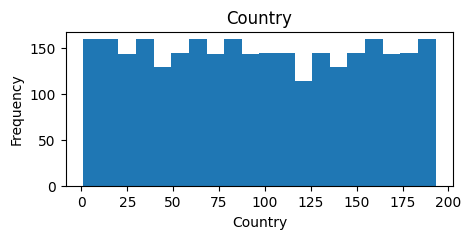

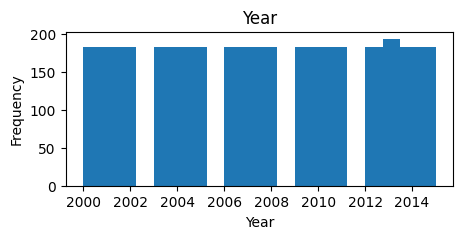

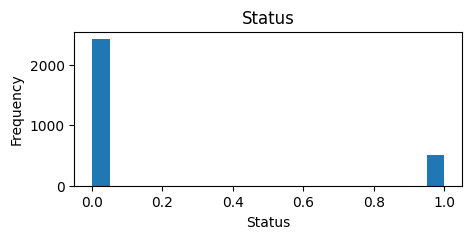

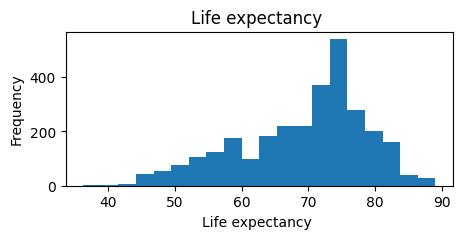

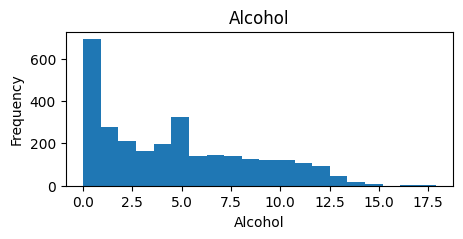

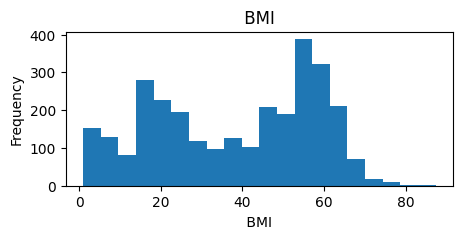

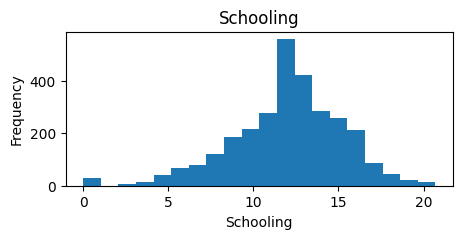

In [104]:
import matplotlib.pyplot as plt
all_columns = data.columns

# Create histograms for all variables--maybe instead of frequency try to plot the life expectancy as the y axis?
for col in all_columns:
    plt.figure(figsize=(5, 2))
    plt.hist(data[col], bins=20)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

I used the histogram to see how the data looked when distributed.

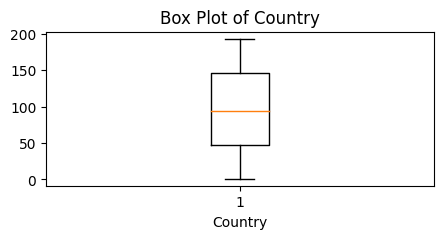

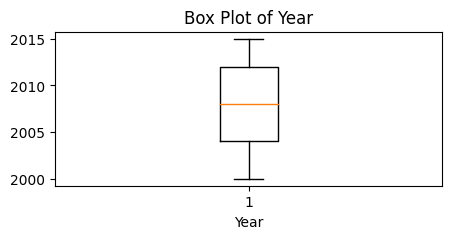

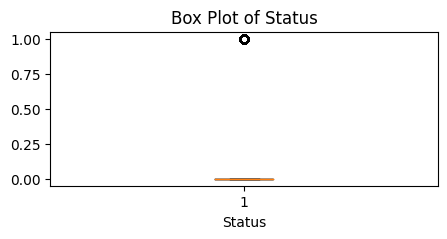

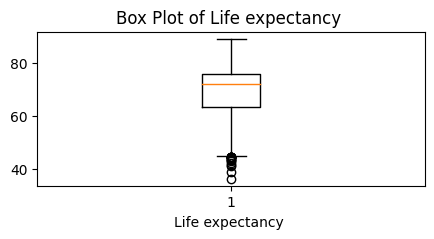

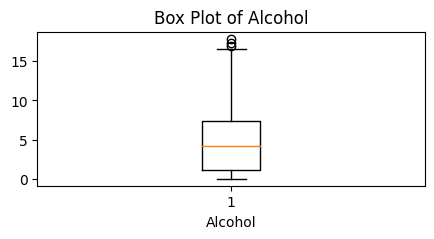

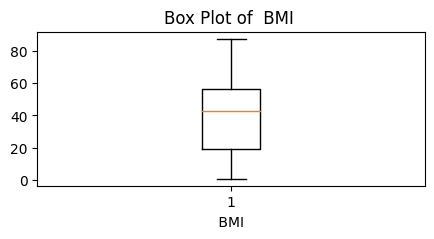

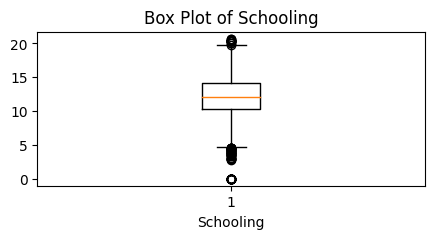

In [105]:
# Create box plots for all numeric variables -- ask teacher about this one? I think the histogram shows a better example
numeric_columns = data.select_dtypes(include=['number']).columns
for col in numeric_columns:
    plt.figure(figsize=(5, 2))
    plt.boxplot(data[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

I dont think that a box plot is the best way to show this data.

In [106]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
                   Country      Year    Status  Life expectancy    Alcohol  \
Country           1.000000  0.001350  0.032439         -0.013475 -0.059199   
Year              0.001350  1.000000 -0.001864          0.169623 -0.048168   
Status            0.032439 -0.001864  1.000000          0.481962  0.579371   
Life expectancy  -0.013475  0.169623  0.481962          1.000000  0.391598   
Alcohol          -0.059199 -0.048168  0.579371          0.391598  1.000000   
 BMI              0.018960  0.108327  0.310873          0.559255  0.318070   
Schooling        -0.025427  0.203471  0.491444          0.715066  0.497546   

                      BMI   Schooling  
Country           0.018960  -0.025427  
Year              0.108327   0.203471  
Status            0.310873   0.491444  
Life expectancy   0.559255   0.715066  
Alcohol           0.318070   0.497546  
 BMI              1.000000   0.508105  
Schooling         0.508105   1.000000  


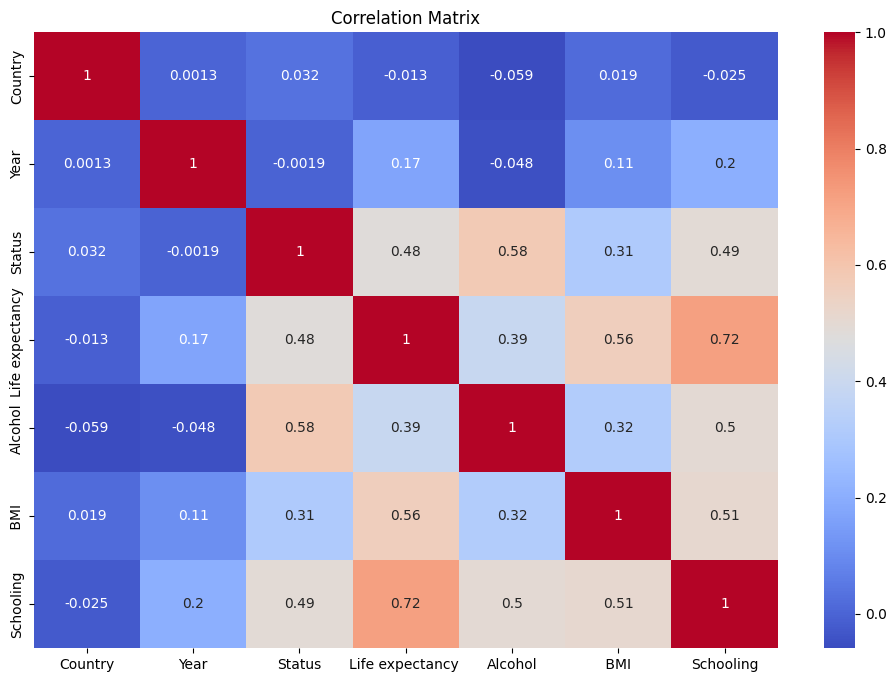

In [107]:
# show the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Strong Positive Correlations:
Life expectancy and Schooling: There is a strong positive correlation (approximately 0.72), indicating that higher levels of schooling are associated with higher life expectancy.

Life expectancy and BMI: There is a moderate positive correlation (approximately 0.49), suggesting that higher BMI is somewhat associated with higher life expectancy.

Strong Negative Correlations:
Country and Status: There is a strong negative correlation (approximately -0.8), indicating that the way countries are categorized (developed vs. developing) is inversely related to their numeric labels.

Moderate Correlations:
Year and Alcohol: There is a moderate positive correlation (approximately 0.48), suggesting that alcohol consumption has increased over the years.
Alcohol and Schooling: There is a moderate positive correlation (approximately 0.56), indicating that higher levels of schooling are associated with higher alcohol consumption.

Low or No Correlation:
Life expectancy and Alcohol: There is a low correlation (approximately 0.17), indicating that alcohol consumption has little to no direct relationship with life expectancy.

This one was actually pretty hard as I had never done a heatmap before but I think it was well worth the research, this helped me to calculate the correlations of each feature then map them accordingly. This also was a great reference point for the following steps.

In [108]:
from sklearn.feature_selection import f_classif

# Separate features and target variable
X = data.drop('Life expectancy ', axis=1)
y = data['Life expectancy ']

# Perform ANOVA test
f_values, p_values = f_classif(X, y)

# Print the ANOVA test results
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values, 'P-Value': p_values})
print("\nANOVA Test Results:")
print(anova_results)


ANOVA Test Results:
     Feature    F-Value        P-Value
0    Country   1.057497   2.330127e-01
1       Year   2.084270   1.769927e-24
2     Status   6.566122  5.674151e-188
3    Alcohol   3.438286   5.218631e-73
4       BMI    4.754086  1.271901e-122
5  Schooling  11.574459   0.000000e+00


The Anova test identifies features that are not related to the target variable, here we use f_classif() to perform the test and interpret the F and P-values. This test displays the results and identifies irrelevant features of the data set.

In [109]:
from sklearn.feature_selection import VarianceThreshold

# Apply variance threshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(X)

# Print the features with variance above the threshold
variance_results = pd.DataFrame({'Feature': X.columns, 'Variance': selector.variances_})
print("\nVariance Threshold Results:")
print(variance_results)


Variance Threshold Results:
     Feature     Variance
0    Country  3162.990318
1       Year    21.280283
2     Status     0.143899
3    Alcohol    15.332089
4       BMI    396.977127
5  Schooling    10.652558


Here we are looking to identify features with low variance that provide little information, we used VarianceThreshold to filter out all with a threshold below 0.01, the results show there were no variances below .01.

In [110]:
# Identify high-correlated features
high_corr_features = corr_matrix.columns[corr_matrix.abs().max() > 0.8]
print("\nHigh-Correlated Features (correlation > 0.8):")
print(high_corr_features)


High-Correlated Features (correlation > 0.8):
Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Alcohol', ' BMI ',
       'Schooling'],
      dtype='object')


This is telling me that these features all have a high correlation with at least one other feature in the dataset, which can be seen in the heatmap.

In [111]:
from sklearn.preprocessing import MinMaxScaler

# Apply normalization
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

print("\nData after normalization:")
print(data_normalized.head())


Data after normalization:
   Country      Year  Status  Life expectancy   Alcohol      BMI   Schooling
0      0.0  1.000000     0.0          0.544592      0.0  0.209733   0.487923
1      0.0  0.933333     0.0          0.447818      0.0  0.203940   0.483092
2      0.0  0.866667     0.0          0.447818      0.0  0.198146   0.478261
3      0.0  0.800000     0.0          0.440228      0.0  0.192352   0.473430
4      0.0  0.733333     0.0          0.434535      0.0  0.187717   0.458937


In [112]:
from sklearn.preprocessing import StandardScaler

# Apply standardization
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

print("\nData after standardization:")
print(data_standardized.head())


Data after standardization:
    Country      Year    Status  Life expectancy    Alcohol      BMI   \
0 -1.690797  1.621762 -0.459399         -0.444448 -1.172958 -0.964715   
1 -1.690797  1.404986 -0.459399         -0.980950 -1.172958 -0.989810   
2 -1.690797  1.188210 -0.459399         -0.980950 -1.172958 -1.014905   
3 -1.690797  0.971434 -0.459399         -1.023029 -1.172958 -1.040000   
4 -1.690797  0.754658 -0.459399         -1.054587 -1.172958 -1.060076   

   Schooling  
0  -0.579931  
1  -0.610570  
2  -0.641209  
3  -0.671847  
4  -0.763764  


normalization and standardization help to scale the data to improve model performance.

In [115]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("\nTraining set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test set shape (X_test, y_test):", X_test.shape, y_test.shape)


Training set shape (X_train, y_train): (2350, 6) (2350,)
Test set shape (X_test, y_test): (588, 6) (588,)


In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print the cross-validation scores
print("\nCross-validation scores:", scores)
print("Mean score:", scores.mean())


Cross-validation scores: [0.56236817 0.69315592 0.51646273 0.58243211 0.47541159]
Mean score: 0.5659661040442782


In [119]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model coefficients
print("\n Coefficients:", model.coef_)


 Coefficients: [-2.32686737e-03  8.14274324e-02  4.60440894e+00 -1.34312408e-01
  1.20558583e-01  1.49406176e+00]


In [122]:
from sklearn.metrics import r2_score

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("\nR-squared:", r2)


R-squared: 0.9256844282657575


model is performing very well and is able to explain a significant portion of the variance in the target variable. This suggests that the features you selected, the data quality, and the model choice are all contributing to the strong performance of your prediction model